In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#ratings of people 
data1 = pd.read_csv('../annotations/annotations_averaged_per_song/song_level/static_annotations_averaged_songs_1_2000.csv')

data2 = pd.read_csv('../annotations/annotations_averaged_per_song/song_level/static_annotations_averaged_songs_2000_2058.csv')

val= data1['valence_mean'].append(data2['valence_mean'], ignore_index = True)
aro= data1['arousal_mean'].append(data2['arousal_mean'], ignore_index = True)


In [3]:
annotation_1 = data1[["song_id", "valence_mean","arousal_mean"]] #45 sec
annotation_2 = data2[["song_id", "valence_mean","arousal_mean"]] #>45 sec
annotation_1


,song_id,valence_mean,arousal_mean
0,2,3.1,3.0
1,3,3.5,3.3
2,4,5.7,5.5
3,5,4.4,5.3
4,7,5.8,6.4
...,...,...,...
1739,1996,3.9,5.9
1740,1997,5.3,3.9
1741,1998,6.4,6.2
1742,1999,4.6,5.4


In [4]:
x=[]
y=[]
for i in val:
    x.append(i)
for i in aro:
    y.append(i)

a = []
for i in range(len(val)):
    a.append(x[i]+1j*y[i])

len(a)

1802

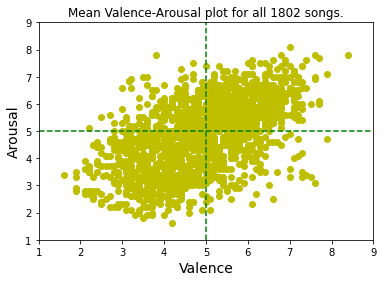

In [5]:
def argand(a ,path, title, xlim_low, xlim_high, ylim_low, ylim_high, orig_x=0, orig_y=0, color='yo'):
    import matplotlib.pyplot as plt
    import numpy as np
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],color,label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((xlim_low, xlim_high))
    plt.ylim((ylim_low, ylim_high))
    plt.ylabel('Arousal', fontsize=14)
    plt.xlabel('Valence', fontsize=14)
    plt.axhline(y = orig_y, color ="green", linestyle ="--")
    plt.axvline(x = orig_x, color ="green", linestyle ="--")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.title(title)
    plt.savefig(path)
    plt.show()



xlim_low = 1
xlim_high = 9
ylim_low = 1 
ylim_high = 9

argand(a, './img/static.png', 'Mean Valence-Arousal plot for all 1802 songs.', xlim_low, xlim_high, ylim_low, ylim_high, 5, 5)



In [6]:
first = second = third = fourth = 0
mid = 4.5
for point in a:
    if point.real > mid and point.imag > mid:
        first += 1
    if point.real < mid and point.imag > mid:
        second += 1
    if point.real < mid and point.imag < mid:
        third += 1
    if point.real > mid and point.imag < mid:
        fourth += 1
first, second, third, fourth

(826, 198, 441, 236)

([<matplotlib.patches.Wedge at 0x7fc381a53100>,
 [Text(0.049757191272406465, 1.0988740700902362, '1st Quadrant'),
  Text(-1.05861108148212, -0.2989022886550999, '2nd Quadrant'),
  Text(-0.12669315904955455, -1.0926796618634596, '3rd Quadrant'),
  Text(0.9971531161426048, -0.4644197056188433, '4th Quadrant')],
 [Text(0.02714028614858534, 0.599385856412856, '48.6%'),
  Text(-0.5774242262629744, -0.16303761199369082, '11.6%'),
  Text(-0.0691053594815752, -0.5960070882891597, '25.9%'),
  Text(0.543901699714148, -0.25331983942846, '13.9%')])

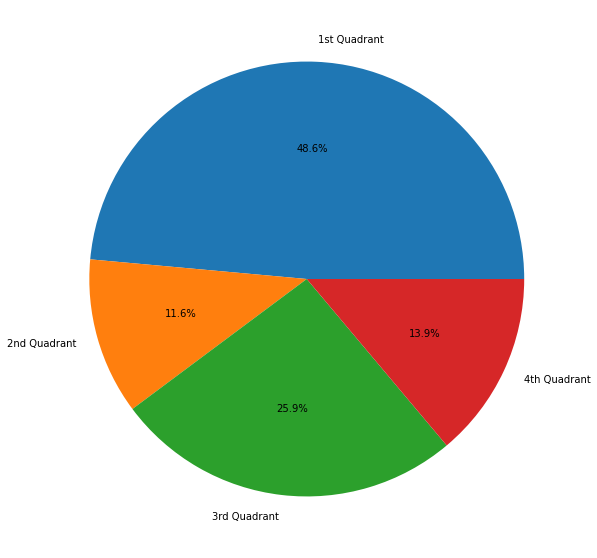

In [7]:
plt.pie([first, second, third, fourth],labels=["1st Quadrant", "2nd Quadrant", "3rd Quadrant", "4th Quadrant"], autopct='%1.1f%%' )

In [8]:
type(annotation_1['song_id'][0])

numpy.int64

In [9]:
filenames = os.listdir("../features")
# annotation_1.loc[str(annotation_1['song_id']) == int(filenames[0][:-4])]

In [10]:
type(filenames[0][:-4])
# annotation_1.index_col = "song_id"
# annotation_1["valence_mean"].loc[annotation_1['song_id'] == 2]

str

In [61]:
df_final=pd.DataFrame()

for file in filenames:
    pathFeat = "../features/"+file
    if (file[:-4].isnumeric() == True and int(file[:-4]) <= 2000):
        shuffled = pd.read_csv(pathFeat, delimiter=";").iloc[30:90].sample(frac=1)
        v1=annotation_1["valence_mean"].loc[annotation_1['song_id'] == int(file[:-4])].iloc[0]
        a1=annotation_1["arousal_mean"].loc[annotation_1['song_id'] == int(file[:-4])].iloc[0]
        shuffled["valence"]=v1 
        shuffled["arousal"]=a1    
        shuffled = shuffled.drop('frameTime', axis=1)
        result = np.array_split(shuffled, 4)
        for i in range(len(result)):
            df_final = df_final.append(pd.DataFrame(np.mean(result[i])).T)
df_final = df_final.sample(frac=1).reset_index().drop(["index"], axis=1)

In [62]:
df_final

,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,shimmerLocal_sma_amean,...,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean,valence,arousal
0,25.967880,87.677045,0.032338,0.746892,0.119356,0.086904,0.134040,0.091135,0.110306,0.155069,...,1.917283,-0.044152,1.846261,0.019739,1.737592,0.044713,1.476542,0.037031,5.7,5.3
1,51.831541,68.705129,0.054971,0.719409,0.098566,0.043753,0.093473,0.043825,0.041093,0.041506,...,2.065008,-0.013948,2.104445,0.006367,1.860021,-0.015406,1.635247,0.012695,6.6,6.0
2,44.323681,77.680451,0.024238,0.733697,0.124936,0.093325,0.105842,0.089991,0.137901,0.165838,...,2.639706,0.001343,2.469255,0.001060,2.135516,-0.006138,1.799148,-0.005734,5.9,6.1
3,101.884613,154.343473,0.118028,0.718711,0.090586,0.056344,0.088539,0.056044,0.095588,0.091273,...,3.281242,-0.003412,3.125535,0.013238,3.070824,-0.048190,2.530825,-0.078760,5.0,6.5
4,48.259954,190.208827,0.023025,0.841092,0.059716,0.040754,0.071063,0.044473,0.085840,0.150421,...,1.655590,0.064808,1.507931,-0.040818,1.389261,-0.001213,1.259173,-0.000049,4.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,146.322243,268.920661,0.059688,0.768624,0.086256,0.091184,0.083534,0.082289,0.111867,0.146697,...,2.468959,0.048852,2.330047,0.004712,2.255477,-0.010327,2.263514,0.003025,6.1,5.5
6940,4.957033,78.506345,0.028585,0.792267,0.076227,0.049145,0.056483,0.042191,0.141640,0.192925,...,1.785294,-0.008736,1.819983,-0.021543,1.427777,0.004283,1.650812,-0.000891,4.5,4.7
6941,32.594829,99.789292,0.037612,0.799162,0.072493,0.042599,0.072744,0.046272,0.121740,0.142886,...,2.002136,-0.021998,1.804229,0.000863,1.801288,-0.050533,1.520744,-0.004203,6.3,6.1
6942,57.940862,168.479513,0.028587,0.806319,0.126468,0.080021,0.156821,0.094471,0.122625,0.193600,...,1.859961,-0.032724,1.584718,0.000990,1.344909,0.017106,1.412219,-0.006063,3.9,2.5


In [66]:
df_final.shape

(6944, 262)

In [68]:
df_final.to_csv('preprocessed.csv', index=False)

In [69]:
df1=pd.read_csv('preprocessed.csv')

In [70]:
df1

,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,shimmerLocal_sma_amean,...,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean,valence,arousal
0,25.967880,87.677045,0.032338,0.746892,0.119356,0.086904,0.134040,0.091135,0.110306,0.155069,...,1.917283,-0.044152,1.846261,0.019739,1.737592,0.044713,1.476542,0.037031,5.7,5.3
1,51.831541,68.705129,0.054971,0.719409,0.098566,0.043753,0.093473,0.043825,0.041093,0.041506,...,2.065008,-0.013948,2.104445,0.006367,1.860021,-0.015406,1.635247,0.012695,6.6,6.0
2,44.323681,77.680451,0.024238,0.733697,0.124936,0.093325,0.105842,0.089991,0.137901,0.165838,...,2.639706,0.001343,2.469255,0.001060,2.135516,-0.006138,1.799148,-0.005734,5.9,6.1
3,101.884613,154.343473,0.118028,0.718711,0.090586,0.056344,0.088539,0.056044,0.095588,0.091273,...,3.281242,-0.003412,3.125535,0.013238,3.070824,-0.048190,2.530825,-0.078760,5.0,6.5
4,48.259954,190.208827,0.023025,0.841092,0.059716,0.040754,0.071063,0.044473,0.085840,0.150421,...,1.655590,0.064808,1.507931,-0.040818,1.389261,-0.001213,1.259173,-0.000049,4.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,146.322243,268.920661,0.059688,0.768624,0.086256,0.091184,0.083534,0.082289,0.111867,0.146697,...,2.468959,0.048852,2.330047,0.004712,2.255477,-0.010327,2.263514,0.003025,6.1,5.5
6940,4.957033,78.506345,0.028585,0.792267,0.076227,0.049145,0.056483,0.042191,0.141640,0.192925,...,1.785294,-0.008736,1.819983,-0.021543,1.427777,0.004283,1.650812,-0.000891,4.5,4.7
6941,32.594829,99.789292,0.037612,0.799162,0.072493,0.042599,0.072744,0.046272,0.121740,0.142886,...,2.002136,-0.021998,1.804229,0.000863,1.801288,-0.050533,1.520744,-0.004203,6.3,6.1
6942,57.940862,168.479513,0.028587,0.806319,0.126468,0.080021,0.156821,0.094471,0.122625,0.193600,...,1.859961,-0.032724,1.584718,0.000990,1.344909,0.017106,1.412219,-0.006063,3.9,2.5
